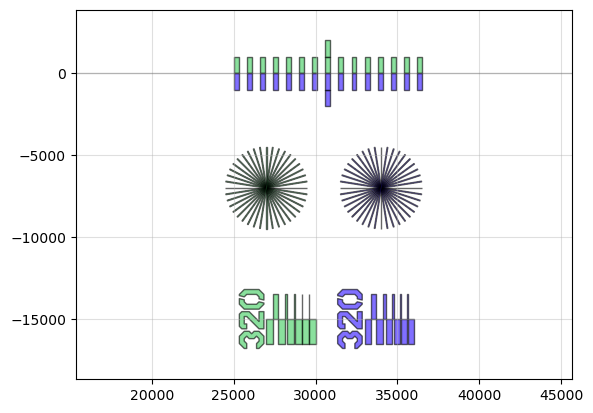

'Finalproject.gds'

In [11]:
from phidl import Device, geometry as pg
from phidl import quickplot as qp

DT= Device()
# Create and add the new pattern
callipers = pg.litho_calipers(
        notch_size=[300, 1000],
        notch_spacing=500,
        num_notches=7,
        offset_per_notch=0.1,
        row_spacing=0,
        layer1=0,
        layer2=1)
callipers_ref = DT.add_ref(callipers)

callipers_ref.move((25000, 0))

#Lithographic star

lithostar = pg.litho_star(
        num_lines = 20,
        line_width = 40,
        diameter = 5000,
        layer = 0
        )
lithostar_ref = DT.add_ref(lithostar)

lithostar_ref.move((27000, -7000))

#Lithographic star

lithostar = pg.litho_star(
        num_lines = 20,
        line_width = 40,
        diameter = 5000,
        layer = 1
        )
lithostar_ref = DT.add_ref(lithostar)

lithostar_ref.move((34000, -7000))


#Step-resolution

Step_resolution = pg.litho_steps(
        line_widths = [10*2,20*2,40*2,80*2,160*2],
        line_spacing = 400,
        height = 3000,
        layer = 0
        )
Step_resolution_ref = DT.add_ref(Step_resolution)

Step_resolution_ref.move((27000, -15000))

#Step-resolution

Step_resolution = pg.litho_steps(
        line_widths = [10*2,20*2,40*2,80*2,160*2],
        line_spacing = 400,
        height = 3000,
        layer = 1
        )
Step_resolution_ref = DT.add_ref(Step_resolution)

Step_resolution_ref.move((33000, -15000))

# Quickplot the geometry
qp(DT)

D.write_gds('Finalproject.gds')


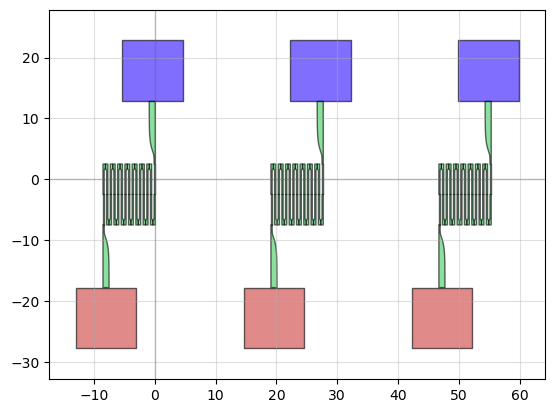

'three_shapes_with_ground_pad.gds'

In [14]:
import phidl.geometry as pg
from phidl import Device, quickplot as qp

def shape_with_ground_pad():
    D = Device()
    s = D << pg.snspd_expanded(layer = 0).rotate(-90)
    contact_pad = D << pg.compass(size = (10,10), layer = 1)
    ground_pad = D << pg.compass(size = (10,10), layer = 50)
    contact_pad.connect('S',s.ports[1])
    ground_pad.connect('N',s.ports[2])
    return D

def three_shapes_with_ground_pad():
    Structures = Device()
    s1 = Structures << shape_with_ground_pad()
    s2 = Structures << shape_with_ground_pad()
    s3 = Structures << shape_with_ground_pad()
    group = s1 + s2 + s3
    group.distribute(direction = 'x', spacing = 10)
    return Structures

qp(three_shapes_with_ground_pad())
D.write_gds('three_shapes_with_ground_pad.gds')